In [1]:
import os
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt


%run "..//src//vgp_helper_fx-pump"

In [2]:
ROOT_FOLDER = "D:\\VGP"

DATA_FOLDER = os.path.join(ROOT_FOLDER, "2P\\proc_s2p\\")
BEHAV_FOLDER = os.path.join(ROOT_FOLDER, "Bonsai\\")
METAFILE = os.path.join(ROOT_FOLDER, "Metafile_VGP2.4.xls")
rows, header = tp.metafilereader(METAFILE, sheetname="Analysis_Cas+malt")


File is excel file. Making csv metafile first


In [3]:
# Goes through metafile assembling data from s2p files where possible

cell_data={}

for row in rows:
    try:
        key=row[0]+'_'+row[3]
        animal=row[0]
        day=row[2]
        date=int(row[1])
        events=row[6]
#         solution=row[3]
        
        s2p_folder = os.path.join(DATA_FOLDER,
                                  "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                                  .format(animal, day, date))
        events_file =BEHAV_FOLDER+events
        
        
        cell_data[key] = assemble_data(s2p_folder,events_file)
        cell_data[key]['animal'] = row[0]
        cell_data[key]['diet'] = row[11]
        cell_data[key]['session'] = row[3]
        cell_data[key]['solution']=row[5]
        
    except FileNotFoundError:
        print('Cannot find file for', key)
     

Cannot find file for VGP306_M5
Cannot find file for VGP307_C3
Cannot find file for VGP402_C1


In [4]:
mice=[]

for key in cell_data.keys(): 
    d=cell_data[key]
    mouseid=d['animal']
    if mouseid not in mice: mice.append(mouseid)

In [6]:
cell_data['VGP118_C1']['df_responsive']

,responsive,activated,inhibited
pump_all,8,5,3
lick_all,7,5,2
pump_only,3,3,1
lick_only,2,3,0
both,5,2,2
neither,5,7,12


In [21]:
PR_C1_licks_act=[]
PR_C1_licks_nonres=[]

PR_C2_licks_act=[]
PR_C2_licks_nonres=[]

PR_C3_licks_act=[]
PR_C3_licks_nonres=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C1':
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        PR_C1_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C1_licks_nonres.append(np.mean(snips_non, axis=0))
        
    elif d['diet']=='PR' and d['session']=='C2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        PR_C2_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C2_licks_nonres.append(np.mean(snips_non, axis=0))
    
    elif d['diet']=='PR' and d['session']=='C3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        PR_C3_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C3_licks_nonres.append(np.mean(snips_non, axis=0))

#Filtering out empty arrays        
PR_C2_licks_act_f=[]        
for animal in PR_C2_licks_act: 
    if not np.isnan(animal).any(): 
        PR_C2_licks_act_f.append(animal)
        
        


In [30]:
PR_M1_licks_act=[]
PR_M2_licks_act=[]
PR_M3_licks_act=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='M1':
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        PR_M1_licks_act.append(np.mean(lick_snips, axis=0))
        
    elif d['diet']=='PR' and d['session']=='M2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        PR_M2_licks_act.append(np.mean(lick_snips, axis=0))       
    
    elif d['diet']=='PR' and d['session']=='M3':
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        PR_M3_licks_act.append(np.mean(lick_snips, axis=0))
        
print(animal)
PR_M2_licks_act_f=[]        
for animal in PR_M2_licks_act: 
    if not np.isnan(animal).any(): 
        PR_M2_licks_act_f.append(animal)

['VGP118', 'VGP203', 'VGP302', 'VGP306', 'VGP307', 'VGP402', 'VGP505', 'VGP506', 'VGP509']


In [34]:
NR_C1_licks_act=[]
NR_C2_licks_act=[]
NR_C3_licks_act=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='C1':
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        NR_C1_licks_act.append(np.mean(lick_snips, axis=0))

        
    elif d['diet']=='NR' and d['session']=='C2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        NR_C2_licks_act.append(np.mean(lick_snips, axis=0))

    
    elif d['diet']=='NR' and d['session']=='C3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        NR_C3_licks_act.append(np.mean(lick_snips, axis=0))




NR_C3_licks_act_f=[]        
for animal in NR_C3_licks_act: 
    if not np.isnan(animal).any(): 
        NR_C3_licks_act_f.append(animal)

In [42]:
NR_M1_licks_act=[]
NR_M2_licks_act=[]
NR_M3_licks_act=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='M1':
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        NR_M1_licks_act.append(np.mean(lick_snips, axis=0))
        
    elif d['diet']=='NR' and d['session']=='M2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        NR_M2_licks_act.append(np.mean(lick_snips, axis=0))

    elif d['diet']=='NR' and d['session']=='M3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['pump_snips_all'][np.where(d['pump_responsive']==1)],axis=1)) 
        NR_M3_licks_act.append(np.mean(lick_snips, axis=0))

        
NR_M2_licks_act_f=[]        
for animal in NR_M2_licks_act: 
    if not np.isnan(animal).any(): 
        NR_M2_licks_act_f.append(animal)
        
        
NR_M3_licks_act_f=[]        
for animal in NR_M3_licks_act: 
    if not np.isnan(animal).any(): 
        NR_M3_licks_act_f.append(animal)
NR_M3_licks_act_f

[array([-0.08108945, -0.0130488 , -0.06562446, -0.02701825, -0.00834971,
        -0.01102909, -0.02573817, -0.02936995,  0.04392433, -0.0062358 ,
        -0.07622075, -0.05291529, -0.03422119,  0.01096083,  0.01541856,
         0.03318809, -0.05667818, -0.02706024, -0.01221409,  0.06076932,
        -0.1004828 , -0.07247669, -0.03935613, -0.12616126, -0.07011516,
        -0.09409884, -0.14350739, -0.16013321, -0.07579461, -0.0413498 ,
        -0.09326734, -0.03769144, -0.06935767, -0.03688686, -0.00564986,
        -0.01417003,  0.00298207, -0.0366891 , -0.03072685, -0.01999179,
        -0.01915466, -0.06765189, -0.08339913, -0.03166663, -0.02662313,
        -0.04772044, -0.04757893, -0.05969802, -0.03178573, -0.0379313 ,
        -0.05321898, -0.02722543, -0.03224943, -0.05377011, -0.10982078,
        -0.00120745, -0.05877334,  0.00329469, -0.05026419, -0.04759371,
        -0.05180828, -0.03698062, -0.1047971 , -0.03012522, -0.0386387 ,
        -0.04539496, -0.04627962, -0.06051832, -0.0

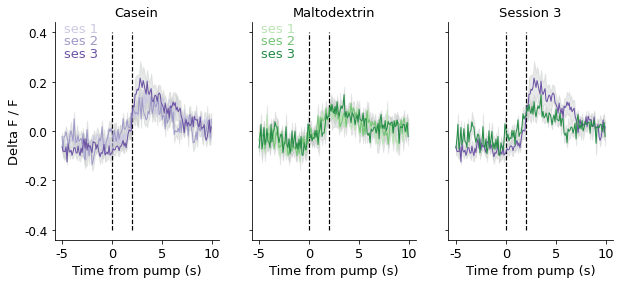

In [51]:
f, ax = plt.subplots(figsize=(10,4),ncols=3, sharey=True)

tp.shadedError(ax[0], PR_C1_licks_act, linecolor="#cbc9e2")

tp.shadedError(ax[0], PR_C2_licks_act_f, linecolor="#9e9ac8")

tp.shadedError(ax[0], PR_C3_licks_act, linecolor="#6a51a3")



tp.shadedError(ax[1], PR_M1_licks_act, linecolor="#bae4b3")

tp.shadedError(ax[1], PR_M2_licks_act_f, linecolor="#74c476")

tp.shadedError(ax[1], PR_M3_licks_act, linecolor="#238b45")


tp.shadedError(ax[2], PR_C3_licks_act, linecolor="#6a51a3")
tp.shadedError(ax[2], PR_M3_licks_act, linecolor="#238b45")


ax[0].text(2, 0.4, "ses 1",color='#cbc9e2', size=13)
ax[0].text(2, 0.35, "ses 2", color="#9e9ac8",size=13)
ax[0].text(2, 0.3, "ses 3", color="#6a51a3",size=13)

ax[1].text(2, 0.4, "ses 1",color='#bae4b3', size=13)
ax[1].text(2, 0.35, "ses 2", color="#74c476",size=13)
ax[1].text(2, 0.3, "ses 3", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.4,-0.2, 0.0, 0.2,0.4])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([70],-0.4,0.4, color="black", linestyle="--", linewidth=1.2)
    axis.vlines([50],-0.4,0.4, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from pump (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
ax[0].set_yticklabels([-0.4,-0.2, 0.0,0.2, 0.4], size=12)

ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)
ax[2].set_title('Session 3', size=13)


f.savefig("..//output//PR_licksnips_casmalt_pump.png")


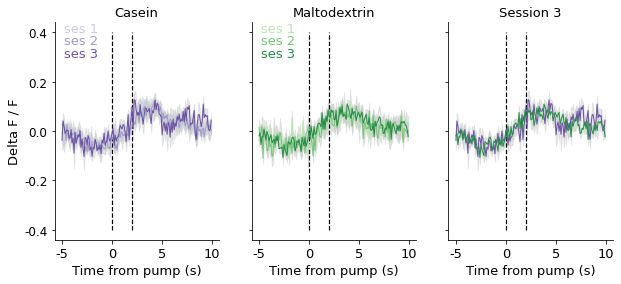

In [53]:
f, ax = plt.subplots(figsize=(10,4),ncols=3, sharey=True)

tp.shadedError(ax[0], NR_C1_licks_act, linecolor="#cbc9e2")

tp.shadedError(ax[0], NR_C2_licks_act, linecolor="#9e9ac8")

tp.shadedError(ax[0], NR_C3_licks_act_f, linecolor="#6a51a3")



tp.shadedError(ax[1], NR_M1_licks_act, linecolor="#bae4b3")

tp.shadedError(ax[1], NR_M2_licks_act_f, linecolor="#74c476")

tp.shadedError(ax[1], NR_M3_licks_act_f, linecolor="#238b45")


tp.shadedError(ax[2], NR_C3_licks_act_f, linecolor="#6a51a3")
tp.shadedError(ax[2], NR_M3_licks_act_f, linecolor="#238b45")



ax[0].text(2, 0.4, "ses 1",color='#cbc9e2', size=13)
ax[0].text(2, 0.35, "ses 2", color="#9e9ac8",size=13)
ax[0].text(2, 0.3, "ses 3", color="#6a51a3",size=13)

ax[1].text(2, 0.4, "ses 1",color='#bae4b3', size=13)
ax[1].text(2, 0.35, "ses 2", color="#74c476",size=13)
ax[1].text(2, 0.3, "ses 3", color="#238b45",size=13)

for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.4,-0.2, 0.0, 0.2,0.4])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([70],-0.4,0.4, color="black", linestyle="--", linewidth=1.2)
    axis.vlines([50],-0.4,0.4, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from pump (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
ax[0].set_yticklabels([-0.4,-0.2, 0.0,0.2, 0.4], size=12)


ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)
ax[2].set_title('Session 3', size=13)


f.savefig("..//output//NR_licksnips_casmalt_pump.png")

In [54]:
cell_data['VGP118_C1']['df_responsive']

,responsive,activated,inhibited
pump_all,8,5,3
lick_all,7,5,2
pump_only,3,3,1
lick_only,2,3,0
both,5,2,2
neither,5,7,12


In [57]:
cols = ["animal", "diet", "session","solution", "lick_activated"]
df_activated = pd.DataFrame(columns=cols)

for key, d in cell_data.items():
    percent_act = d["df_responsive"].loc["pump_all", "responsive"] / np.sum(d["df_responsive"].loc['lick_only':'neither',"activated"]) * 100
    data = np.array([d["animal"], d["diet"], d["session"], d["solution"],percent_act])
    df_temp = pd.DataFrame({col: value for col, value in zip(cols, data)},
                          index=[key.split("_")[0]]).astype({'lick_activated':'float'})
    

    df_activated = pd.concat([df_activated, df_temp])
df_activated


<ipython-input-57-dedddcbc6a16>:5: RuntimeWarning: invalid value encountered in longlong_scalars
  percent_act = d["df_responsive"].loc["pump_all", "responsive"] / np.sum(d["df_responsive"].loc['lick_only':'neither',"activated"]) * 100


,animal,diet,session,solution,lick_activated
VGP118,VGP118,PR,C1,Cas,66.666667
VGP118,VGP118,PR,C2,Cas,40.000000
VGP118,VGP118,PR,M1,Malt,57.142857
VGP118,VGP118,PR,M2,Malt,30.000000
VGP118,VGP118,PR,M3,Malt,15.789474
...,...,...,...,...,...
VGP509,VGP509,PR,C1,Cas,51.851852
VGP509,VGP509,PR,M2,Malt,55.172414
VGP509,VGP509,PR,C2,Cas,56.521739
VGP509,VGP509,PR,C3,Cas,92.000000


In [58]:
df_pref = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["solution"],
                         values="lick_activated",
                         aggfunc="mean")
             .astype({"Cas": "float", "Malt": "float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
             .assign(pref=lambda df_: df_.Cas - df_.Malt)
            )


In [59]:
df_session = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["session"],
                         values="lick_activated",
#                          aggfunc="mean"
                                 )
             .astype({"C1": "float", 'C2':"float","C3":"float","M1": "float","M2":"float", "M3":"float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
        )

Dataframes for each group (NR and PR) Casein and maltodextrin activated cells

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making dataframe for NR-NRPR group
df_NR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Cas")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PR", "PRNR"])
 .dropna()
)

df_NR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Malt")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PR", "PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Cas")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR,
         PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NR", "NRPR"])
 .dropna()
)

df_PR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Malt")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR,
         PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NR", "NRPR"])
 .dropna()
)



Figure for cells activated by casein and maltodextrin

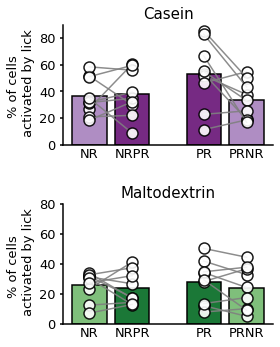

In [61]:
NR_cas=[]
NRPR_cas=[]
for row in df_NR_cas.iterrows():
    NR_cas.append(row[1].NR)
    NRPR_cas.append(row[1].NRPR)

NR_malt=[]
NRPR_malt=[]
for row in df_NR_malt.iterrows():
    NR_malt.append(row[1].NR)
    NRPR_malt.append(row[1].NRPR)
    
    
PR_cas=[]
PRNR_cas=[]
for row in df_PR_cas.iterrows():
    PR_cas.append(row[1].PR)
    PRNR_cas.append(row[1].PRNR)

PR_malt=[]
PRNR_malt=[]
for row in df_PR_malt.iterrows():
    PR_malt.append(row[1].PR)
    PRNR_malt.append(row[1].PRNR)

    

colors_1=['#af8dc3', '#762a83','#762a83','#af8dc3']
colors_M=['#7fbf7b', '#1b7837','#1b7837','#7fbf7b']


f,ax=plt.subplots(figsize=(4.5,5), ncols=1, nrows=2, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)

tp.barscatter([[NR_cas,NRPR_cas],[PR_cas,PRNR_cas]], 
              paired= True,
              barfacecolor=colors_1,
              barfacecolor_option="individual",
              barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[0],
              show_legend=False)

tp.barscatter([[NR_malt,NRPR_malt],[PR_malt,PRNR_malt]], 
              paired= True,
              barfacecolor=colors_M,
              barfacecolor_option="individual",
              barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[1],
              show_legend=False)

ax[0].set_ylabel('% of cells \n activated by lick',fontsize = 13)
ax[0].set_yticks([0,20,40,60,80])
ax[0].set_yticklabels([0,20,40,60,80], fontsize = 13)

ax[1].set_ylabel('% of cells \n activated by lick',fontsize = 13)
ax[1].set_yticks([0,20,40,60,80])
ax[1].set_yticklabels([0,20,40,60,80], fontsize = 13)


ax[0].set_title('Casein', fontsize =15)
ax[1].set_title('Maltodextrin', fontsize =15)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\%_lick_activated_cells_pump.png')

Dataframes for each group (NR and PR) Preferense

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making dataframe for NR-NRPR group
df_NR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PR", "PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR,
         PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NR", "NRPR"])
 .dropna()
)

# print(df_NR)
# print(df_PR)





Figure for proportion of cells activated by casin - malodextrin

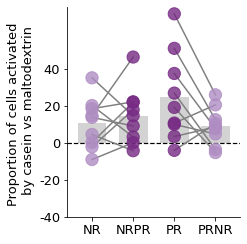

In [63]:
f, ax = plt.subplots(figsize=(4,4))
f.subplots_adjust(wspace=0.15,hspace=0.35, bottom=0.15, left=0.3)


x1 = [1,2]
x2=[3,4]
for row in df_NR.iterrows():
    y = [row[1].NR,row[1].NRPR]
#     print(y)
    ax.plot(x1, y, color="grey")
    ax.scatter(x1, y, s=150, color=["#af8dc3", "#762a83"], zorder=20, alpha=0.8)

for row in df_PR.iterrows():
    y = [row[1].PR,row[1].PRNR]
#     print(y)
    ax.plot(x2, y, color="grey")
    ax.scatter(x2, y, s=150, color=["#762a83", "#af8dc3"], zorder=20, alpha=0.8)

  
    
ax.bar(x1, [df_NR.NR.mean(), df_NR.NRPR.mean()], width=0.7, zorder=-1, color="lightgrey")
ax.bar(x2, [df_PR.PR.mean(), df_PR.PRNR.mean()], width=0.7, zorder=-1, color="lightgrey")
    
ax.set_ylabel("Proportion of cells activated \n by casein vs maltodextrin", size=13)
ax.set_yticks([-40,-20,0,20,40])
ax.set_yticklabels(['-40','-20','0','20','40'], size=13)

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["NR", 'NRPR','PR','PRNR'], size=13)
ax.set_xlim([0.4,4.6])

ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=1.2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\pref_casein_cells_pump.png')

In [20]:
PR_C1_lick=[]
PR_C2_lick=[]
PR_C3_lick=[]

PR_M1_lick=[]
PR_M2_lick=[]
PR_M3_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C1':
        PR_C1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

    elif d['diet']=='PR' and d['session']=='C2':
        PR_C2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR' and d['session']=='C3':
        PR_C3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='PR'and d['session']=='M1':
        PR_M1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR'and d['session']=='M2':
        PR_M2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR'and d['session']=='M3':
        PR_M3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)


len(PR_C3_lick)

7

In [21]:
NR_C1_lick=[]
NR_C2_lick=[]
NR_C3_lick=[]

NR_M1_lick=[]
NR_M2_lick=[]
NR_M3_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='C1':            
        lick_act=(len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))
        all_cells=len(d['lick_responsive'])
        NR_C1_lick.append(lick_act/all_cells*100)
    elif d['diet']=='NR' and d['session']=='C2':
        NR_C2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR' and d['session']=='C3':
        NR_C3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='NR'and d['session']=='M1':
        NR_M1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR'and d['session']=='M2':
        NR_M2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR'and d['session']=='M3':
        NR_M3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)


len(NR_M3_lick)

8

Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.


(<AxesSubplot:>,
 [0.75, 1.0, 1.25, 1.75, 2.0, 2.25],
 [<BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>],
  <matplotlib.collections.PathCollection at 0x2298cad98e0>])

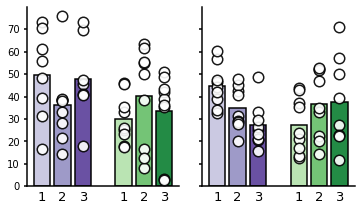

In [22]:
colors_1=['#762a83', '#af8dc3','#7fbf7b','#1b7837']


f,ax=plt.subplots(figsize=(7,3), ncols=2, nrows=1, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)
colors=['#cbc9e2','#9e9ac8','#6a51a3','#bae4b3','#74c476','#238b45']


tp.barscatter([[PR_C1_lick,PR_C2_lick,PR_C3_lick],[PR_M1_lick,PR_M2_lick,PR_M3_lick]], 
#               paired= True,
              barfacecolor=colors,
              barfacecolor_option="individual",
              barlabels=['1','2','3', '1','2','3'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[0],
              show_legend=False)

tp.barscatter([[NR_C1_lick,NR_C2_lick,NR_C3_lick],[NR_M1_lick,NR_M2_lick,NR_M3_lick]], 
#               paired= True,
              barfacecolor=colors,
              barfacecolor_option="individual",
              barlabels=['1','2','3', '1','2','3'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[1],
              show_legend=False)



In [23]:
df_diet1 = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
 .drop(columns=["NRPR", "PRNR"])
)



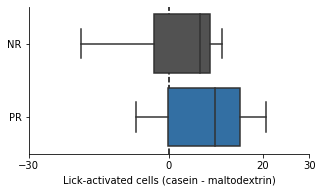

In [24]:
my_colors = {'NR': '#525252', 'PR': '#2171b5'}

'','','',''
f, ax = plt.subplots(figsize=(6,3),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})

sns.boxplot(data=df_diet1,orient="h", ax=ax, palette=my_colors)


ax.set_ylabel("")
ax.set_yticklabels(["NR", "PR"])
ax.set_xticks([-30, 0, 20, 30])
ax.set_xlabel("Lick-activated cells (casein - maltodextrin)")

ax.axvline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [25]:
df_boxplot = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
#  .drop(columns=["NRPR", "PRNR"])
)





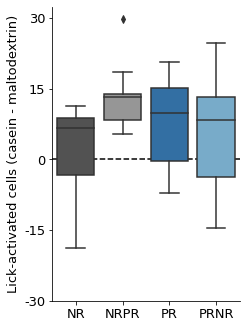

In [26]:
my_colors = {'NR': '#525252', 'NRPR': '#969696', 'PR': '#2171b5','PRNR':'#6baed6'}

'','','',''
f, ax = plt.subplots(figsize=(4,6),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})


sns.boxplot(data=df_boxplot,orient="v", ax=ax, palette=my_colors)


ax.set_xlabel("")
ax.set_xticklabels(["NR",'NRPR', "PR", 'PRNR'],size=13)
ax.set_yticks([-30, -15,0, 15, 30])
ax.set_yticklabels(['-30','-15', '0', '15', '30'],size=13)
ax.set_ylabel("Lick-activated cells (casein - maltodextrin)",size=13)

ax.axhline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [27]:
sns.boxplot?

Signature:
sns.boxplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A 